# Protocol Buffers

- Protocol buffers are Google’s language-neutral, platform-neutral, extensible mechanism for serializing structured data — think XML, but smaller, faster, and simpler. - You define how you want your data to be structured once, then you can use special generated source code to easily write and read your structured data to and from a variety of data streams and using a variety of languages.

- Protocol buffers are defined by a file .proto text file, we can easily read it and understand it as human.

## Advantages of protocol buffers over JSON/XML.

- Data is fully typed.
- Data is compressed automatically, so less CPU intensive.
- Documentation / comments can be embedded in schema (.proto file)
- Data can be read across any language (Python, Java, Go, C++, RUBY)
- 3 - 10x smaller and 20 - 100x faster than XML.
- protoc is a .proto compiler and it automatically generates code for us to use.

## Disadvantages of the protocol.

- Lack of resources.
- Smaller community.
- Can’t open serialized data in a text editor.

## Defining Protocol Format(message)

- To create your person application/message, you’ll need to start with a .proto file. 
- The definitions in a .proto the file is simple: 
    + you add a message for each data structure you want to serialize, 
    + then specify a name and a type for each field in the message. 
- Here is the .proto file that defines your messages, person.proto.

```
syntax = "proto3";
package person;

message Person {
    optional string name = 1;
    optional int32 id = 2;
    optional string email = 3;
}
```

- The .proto the file starts with a package declaration(here PERSON), which helps to prevent naming conflicts between different projects. 
- In C++, your generated classes will be placed in a namespace(PERSON) matching the package name.

- Next, we have our message definitions. 
- A message is just an aggregate containing a set of typed fields. 
- Many standard simple data types are available as field types, including bool, int32, float, double, and string.

- Each field must be annotated with one of the following modifiers:

    1. optional : 
        + The field may or may not be set. 
        + If an optional field value isn’t set, a default value is used(zero for numeric types, the empty string for strings, false for bools).
    2. repeated : Think of repeated fields as dynamically sized arrays(or std::vector)

#### Tags
- For protobuff the important element is tag (in person.proto name=1, id=2, email=3, these numbers are the tags), 
- the smallest tag is 1 & largest is 2²⁹-1, 
- we cannot use 19000–19999 because these are reserved by Google.

#### Install PROTOC compiler

Ubuntu : ```sudo apt install protobuf-compiler```

#### Let’s compile person.proto

```
protoc -I=$SRC_DIR --cpp_out=$DST_DIR $SRC_DIR/person.proto 
//if you are in the SRC_DIR or working directory, you can execute with fallowing cmd.
protoc -I=./ --cpp_out=./ person.proto
```

This generates the following files in your specified destination directory:
1. person.pb.cc
2. person.pb.h

#### The Protocol Buffer API

- If you look in person.pb.h, you can see that you have a class for each message you specified in person.proto.

- these are the following API’s we can call on defined fields that we definedperson.proto file.

```
// string name
  inline bool has_name() const; //to see if name exit or initialised 
  inline void clear_name();     // to clear name from person message
  inline const ::std::string& name() const; // to get name
  inline void set_name(const ::std::string& value); // to set name
  inline void set_name(const char* value);
  inline ::std::string* mutable_name();  //returns the pointer to set/get name

  // int id
  inline bool has_id() const;
  inline void clear_id();
  inline int32_t id() const;
  inline void set_id(int32_t value);

  // string email
  inline bool has_email() const;
  inline void clear_email();
  inline const ::std::string& email() const;
  inline void set_email(const ::std::string& value);
  inline void set_email(const char* value);
  inline ::std::string* mutable_email();
  ```

### Repeated Fields (Arrays or List)

- Repeated modifier allow us to create dynamic sized arrays or list,.

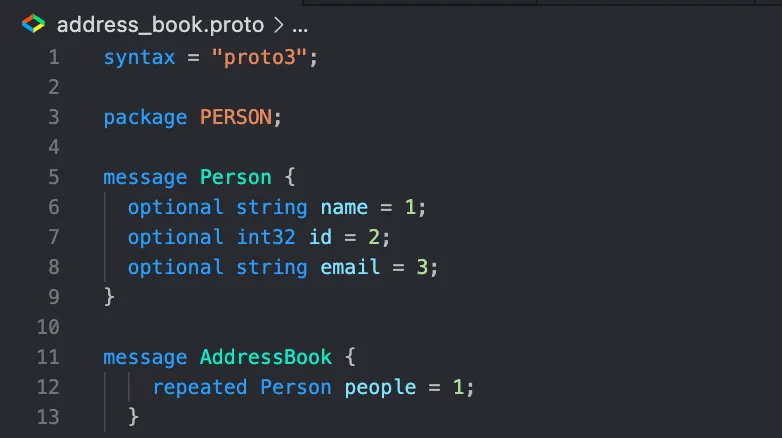

### ENUM (Enumeration).

- We can use Enums if we know all the values a field can take.
- Enum must start by tag0.
- The first value of enum is the default value (tag 0), even if we do not initialise the enum field default value(tag 0) will be initlised.

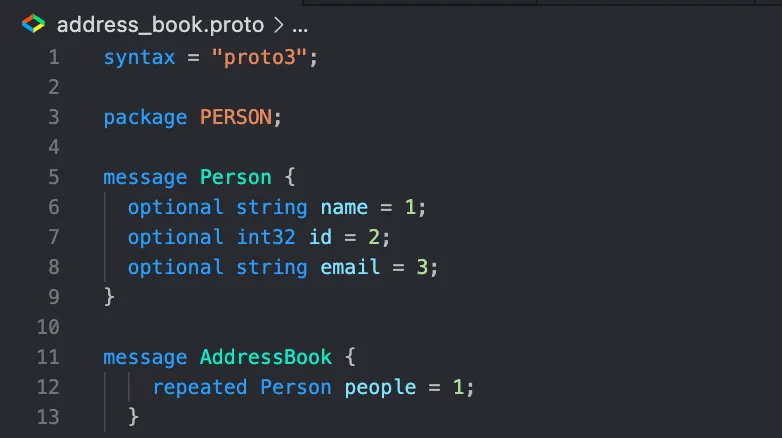

### Packages

- It’s important define packages in proto messages (likepackage PERSON as in previous examples) to avoid name conflicts between different messages.

- Let’s create date package

```
// date_pkg.proto
syntax = "proto3";
package my.date.module;   //date.pkg is the package name
message Date{
     int32 year=1;
     int32 month=2;
     int32 day=3;
}
```

- Now let’s see how we can import this in person.proto message

```
// person.proto
syntax = "proto3";
import "date_pkg.proto";  // fully qualified path of .proto message 
message Person{ 
        my.date.module.Date Birthday=1; //!!!!!
        int32 age=2;
        int32 id=3;
}
```



  

